# Summative Assessment: Individual Presentation for Machine Learning
Needed to install package 'torch' before starting the assignment with CIFAR 10. Other popular method is Tensorflow library


## Step 1 - Importing the relevant libraries and Data Preprocessing
Import relevant libraries and then get the images normalised ready for data processing

In [1]:
#Import libraries, may need installing beforehand. Torch is the main library for constructing a CNN
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define transformations for the training and testing sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=5,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


## Step 2 - Defining the Model, Creating neural network architecture (Convolutional Nerual Network) 

In [2]:
# Defining a simple Convolutional Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #First convolutional layer - 3 input channels RGB,6 output channels, kernel size=5
        self.pool = nn.MaxPool2d(2, 2) #Pooling - taking 2x2 pixel patch of each image
        self.conv2 = nn.Conv2d(6, 16, 5) #Second convolutional layer - take the 6 channel output from conv1 into input
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #First fully connected layer
        self.fc2 = nn.Linear(120, 84) #Second fully connected layer - output of 120 is feeded back into fc2
        self.fc3 = nn.Linear(84, 10) #Output Layer - has to fit into 10 classes w/probability

    def forward(self, x): #declare forward pass of function
        x = self.pool(F.relu(self.conv1(x))) #activation function 1
        x = self.pool(F.relu(self.conv2(x))) #activation function 2
        x = x.view(-1, 16 * 5 * 5) #Flatten
        x = F.relu(self.fc1(x)) #Fully connected layer 1 passed back into activation function
        x = F.relu(self.fc2(x)) #FCL2 passed back into activation function
        x = self.fc3(x)
        return x

net = Net()

## Step 3 - Training the model, using the loss function
Terminology to know:
Stochastic gradient descent (SGD) is used for optimising an objective function.
Learning rate (lr) set to common 0.001 to avoid overshooting.
Epoch's represent the number of full cycles through a training set.

In [6]:
# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
for epoch in range(10):  # loop over the dataset multiple times. Can Alter Epoch e.g. in range(XXX)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        optimizer.zero_grad() # zero the parameter gradients
        outputs = net(inputs) #Forward pass
        loss = criterion(outputs, labels) #Compute the loss
        loss.backward() #Backward pass (compute gradients)
        optimizer.step() #Update weights
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

[Epoch 1, Batch 200] loss: 2.302
[Epoch 1, Batch 400] loss: 2.270
[Epoch 1, Batch 600] loss: 2.183
[Epoch 1, Batch 800] loss: 2.057
[Epoch 1, Batch 1000] loss: 2.043
[Epoch 1, Batch 1200] loss: 1.991
[Epoch 1, Batch 1400] loss: 1.978
[Epoch 1, Batch 1600] loss: 1.882
[Epoch 1, Batch 1800] loss: 1.866
[Epoch 1, Batch 2000] loss: 1.812
[Epoch 1, Batch 2200] loss: 1.794
[Epoch 1, Batch 2400] loss: 1.746
[Epoch 1, Batch 2600] loss: 1.680
[Epoch 1, Batch 2800] loss: 1.672
[Epoch 1, Batch 3000] loss: 1.674
[Epoch 1, Batch 3200] loss: 1.685
[Epoch 1, Batch 3400] loss: 1.653
[Epoch 1, Batch 3600] loss: 1.653
[Epoch 1, Batch 3800] loss: 1.637
[Epoch 1, Batch 4000] loss: 1.630
[Epoch 1, Batch 4200] loss: 1.612
[Epoch 1, Batch 4400] loss: 1.628
[Epoch 1, Batch 4600] loss: 1.583
[Epoch 1, Batch 4800] loss: 1.599
[Epoch 1, Batch 5000] loss: 1.524
[Epoch 1, Batch 5200] loss: 1.541
[Epoch 1, Batch 5400] loss: 1.576
[Epoch 1, Batch 5600] loss: 1.495
[Epoch 1, Batch 5800] loss: 1.565
[Epoch 1, Batch 60

## Step 4 - Evaluating the effectiveness of the network

In [7]:
# Save the trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# Test the network on the test data
net.load_state_dict(torch.load(PATH))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader: #loading in test data
        images, labels = data
        outputs = net(images) #Creating forward pass
        _, predicted = torch.max(outputs.data, 1) #converts output to predicted label class (1-10)
        total += labels.size(0) #x+=y same as x=x+y creates accumulated figures
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10000 test images: 63.13%


## Step 5 - Prediction, can model predict category of new images?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


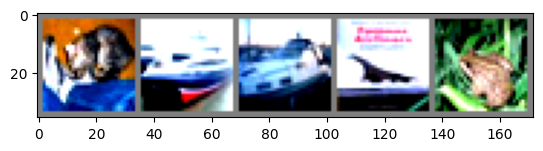

GroundTruth:  cat   ship  ship  plane frog 
Predicted:  cat   car   truck plane deer 


In [16]:
# Display some of the test images along with their predicted labels
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(testloader)

# Function to pick and display 5 new random images
def pick_and_display_images():
    images, labels = next(dataiter)
    
    # Display images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(5)))

    # Predict the classes for the images
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(5)))

# Call the function to display 5 new random images
pick_and_display_images()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


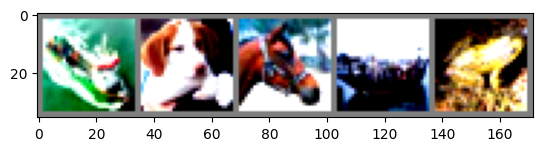

GroundTruth:  ship  dog   horse ship  frog 
Predicted:  ship  cat   truck ship  frog 


In [19]:
pick_and_display_images()

## Adjusting parameters to increase our efficiency
Here are some examples on increasing efficiency in our model; 
Increase number of epochs (passes through network) – allow it to learn more from the extra passes. BUT we need to monitor for overfitting which impacts accuracy. 
Create new training samples – greater diversity to help reduce overfitting.
Adjust Learning Rate (LR) – Higher LR can speed up training but could cause a suboptimal solution. Lower LR may require more epochs also. Finding the right balance is important.
Hyperparameter tuning – Techniques like Bayesian optimisation will allow to find the ideal learning rate, batch size, number of layers for efficiency. 


### We'll be redoing from step 3 to hopefully get a higher efficiency number 

[Epoch 1, Batch 200] loss: 2.295
[Epoch 1, Batch 400] loss: 2.250
[Epoch 1, Batch 600] loss: 2.148
[Epoch 1, Batch 800] loss: 2.042
[Epoch 1, Batch 1000] loss: 1.920
[Epoch 1, Batch 1200] loss: 1.943
[Epoch 1, Batch 1400] loss: 1.860
[Epoch 1, Batch 1600] loss: 1.814
[Epoch 1, Batch 1800] loss: 1.785
[Epoch 1, Batch 2000] loss: 1.742
[Epoch 1, Batch 2200] loss: 1.748
[Epoch 1, Batch 2400] loss: 1.756
[Epoch 1, Batch 2600] loss: 1.676
[Epoch 1, Batch 2800] loss: 1.723
[Epoch 1, Batch 3000] loss: 1.732
[Epoch 1, Batch 3200] loss: 1.703
[Epoch 1, Batch 3400] loss: 1.665
[Epoch 1, Batch 3600] loss: 1.661
[Epoch 1, Batch 3800] loss: 1.596
[Epoch 1, Batch 4000] loss: 1.649
[Epoch 1, Batch 4200] loss: 1.618
[Epoch 1, Batch 4400] loss: 1.602
[Epoch 1, Batch 4600] loss: 1.638
[Epoch 1, Batch 4800] loss: 1.598
[Epoch 1, Batch 5000] loss: 1.565
[Epoch 1, Batch 5200] loss: 1.578
[Epoch 1, Batch 5400] loss: 1.531
[Epoch 1, Batch 5600] loss: 1.487
[Epoch 1, Batch 5800] loss: 1.544
[Epoch 1, Batch 60

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


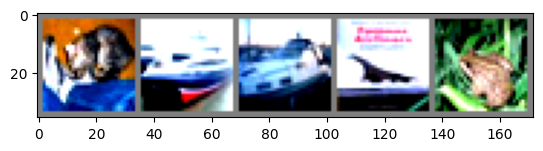

GroundTruth:  cat   ship  ship  plane frog 
Predicted:  cat   ship  plane plane frog 


In [3]:
# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.00095, momentum=0.9)

# Train the network
for epoch in range(20):  # loop over the dataset multiple times. Can Alter Epoch e.g. in range(XXX)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        optimizer.zero_grad() # zero the parameter gradients
        outputs = net(inputs) #Forward pass
        loss = criterion(outputs, labels) #Compute the loss
        loss.backward() #Backward pass (compute gradients)
        optimizer.step() #Update weights
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

# Save the trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# Test the network on the test data
net.load_state_dict(torch.load(PATH))

correct = 0
total = 0
with torch.no_grad():
    for data in testloader: #loading in test data
        images, labels = data
        outputs = net(images) #Creating forward pass
        _, predicted = torch.max(outputs.data, 1) #converts output to predicted label class (1-10)
        total += labels.size(0) #x+=y same as x=x+y creates accumulated figures
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

# Display some of the test images along with their predicted labels
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(testloader)

# Function to pick and display 5 new random images
def pick_and_display_images():
    images, labels = next(dataiter)
    
    # Display images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(5)))

    # Predict the classes for the images
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(5)))

# Call the function to display 5 new random images
pick_and_display_images()